# Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
AVO = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
AVO.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [3]:
AVO.shape

(16468, 14)

In [4]:
print("There are {:,} rows ".format(AVO.shape[0]) + "and {} columns in our data".format(AVO.shape[1]))

There are 16,468 rows and 14 columns in our data


In [5]:
AVO.set_index('Date', inplace=True)

In [6]:
AVO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16468 entries, 27-12-2015 to nan
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(11), object(2)
memory usage: 1.8+ MB


In [7]:
AVO.isnull().sum()

Unnamed: 0      14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [8]:
NULLS = AVO[AVO.isnull().any(axis=1)]

In [9]:
AVO.dtypes

Unnamed: 0      float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

<Axes: ylabel='Date'>

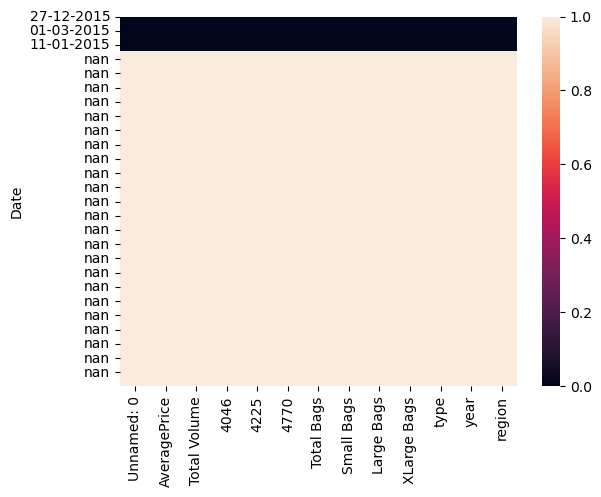

In [10]:
sns.heatmap(AVO.isnull())

In [11]:
AVO.columns 

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
AVO.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [13]:
AVO.duplicated().sum()

14950

In [14]:
AVO.sort_values(by="Total Volume", ascending=True).head(15)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
15-02-2015,45.0,1.35,38750.74,880.54,19621.76,7.48,18240.96,18118.74,122.22,0.0,conventional,2015.0,Syracuse
18-01-2015,49.0,1.40,40391.55,789.84,24755.46,27.89,14818.36,14818.36,0.00,0.0,conventional,2015.0,Syracuse
08-03-2015,42.0,1.07,40507.36,795.68,30370.64,159.05,9181.99,8827.55,354.44,0.0,conventional,2015.0,Albany
04-01-2015,51.0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015.0,Albany
04-01-2015,51.0,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.0,conventional,2015.0,Syracuse
11-01-2015,50.0,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015.0,Albany
15-02-2015,45.0,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.0,conventional,2015.0,Albany
11-01-2015,50.0,1.45,42017.49,984.29,21576.29,14.93,19441.98,19441.98,0.00,0.0,conventional,2015.0,Syracuse
15-03-2015,41.0,1.36,42078.58,2534.42,20482.33,18.86,19042.97,19020.75,22.22,0.0,conventional,2015.0,Syracuse


In [15]:
AVO.sort_values(by="Total Volume", ascending=False).head(15)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
01-02-2015,47.0,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015.0,TotalUS
03-05-2015,34.0,0.96,41291704.39,17787611.93,16602589.04,1118329.50,5783173.92,4647155.48,1110987.23,25031.21,conventional,2015.0,TotalUS
14-06-2015,28.0,0.98,37026085.75,16383685.07,12821015.03,1085081.61,6736304.04,5893641.72,822399.78,20262.54,conventional,2015.0,TotalUS
07-06-2015,29.0,1.00,36549995.66,16529797.60,12582265.21,1144715.95,6293216.90,5304562.91,943995.95,44658.04,conventional,2015.0,TotalUS
10-05-2015,33.0,1.02,36400886.58,16215328.75,13509064.65,858145.45,5818347.73,4991625.82,816629.40,10092.51,conventional,2015.0,TotalUS
21-06-2015,27.0,1.02,35734613.90,14699604.93,13244466.60,1326422.56,6464119.81,5517909.51,898027.46,48182.84,conventional,2015.0,TotalUS
24-05-2015,31.0,1.04,35344183.15,16000107.80,12513821.19,899779.92,5930474.24,5094263.38,815628.55,20582.31,conventional,2015.0,TotalUS
31-05-2015,30.0,1.03,33720159.09,15503613.33,11599634.02,903908.35,5713003.39,4967231.63,726046.25,19725.51,conventional,2015.0,TotalUS
19-04-2015,36.0,1.03,33091256.26,14251319.31,12277858.78,1016631.26,5545446.91,4696224.79,819935.17,29286.95,conventional,2015.0,TotalUS


# Create a heatmap for the correlation matrix

<Axes: >

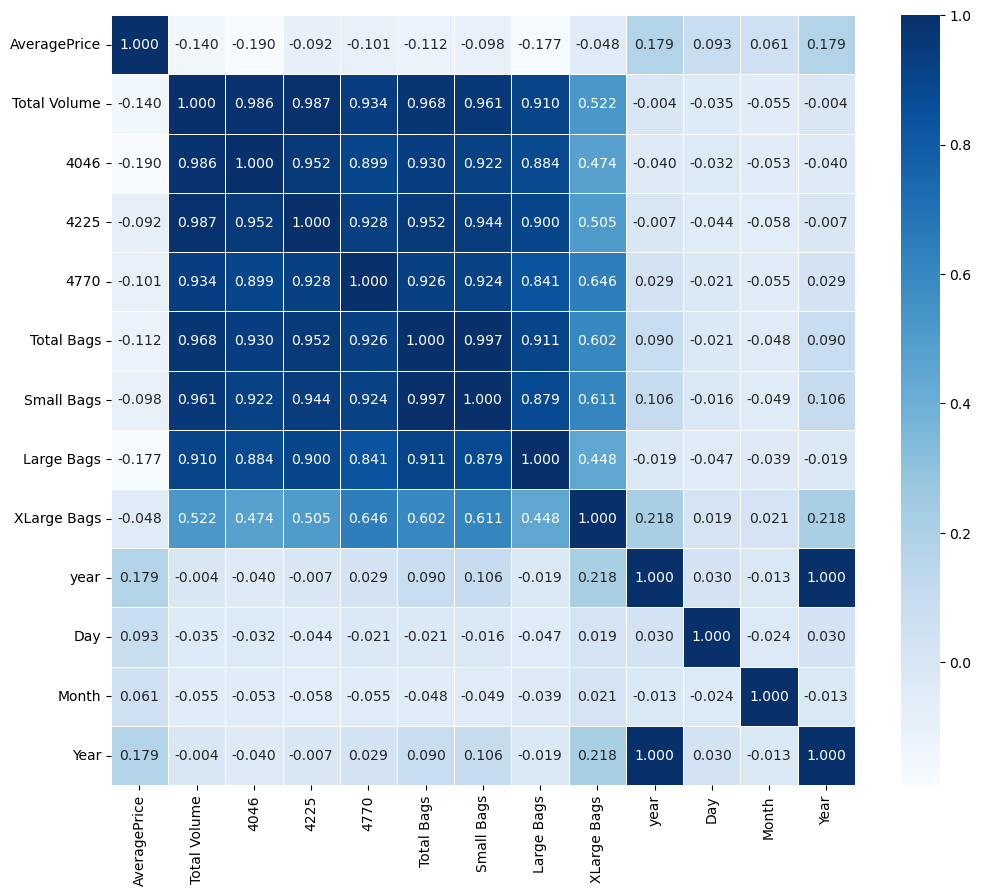

In [41]:
 plt.figure(figsize=(12,10))
sns.heatmap(AVO.corr(),cmap='Blues',linewidth=0.5, annot=True,fmt='.3f')

# EDA ---- Performing 

Ploting Outliners 

Calculates the skewness of the data rather than identifying and plotting outliers.

In [42]:
AVO.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
Day             0.041303
Month           0.101439
Year            1.828332
dtype: float64

# Now Univeriate Analysis

When We execute this code, you will get 25 box plots, each representing the distribution of a numerical column in the DataFrame `AVO`. This can be useful to quickly visualize the distribution, quartiles, and potential outliers for each numerical variable in the dataset.

AveragePrice       Axes(0.125,0.747241;0.133621x0.132759)
Total Volume    Axes(0.285345,0.747241;0.133621x0.132759)
4046             Axes(0.44569,0.747241;0.133621x0.132759)
4225            Axes(0.606034,0.747241;0.133621x0.132759)
4770            Axes(0.766379,0.747241;0.133621x0.132759)
Total Bags         Axes(0.125,0.587931;0.133621x0.132759)
Small Bags      Axes(0.285345,0.587931;0.133621x0.132759)
Large Bags       Axes(0.44569,0.587931;0.133621x0.132759)
XLarge Bags     Axes(0.606034,0.587931;0.133621x0.132759)
year            Axes(0.766379,0.587931;0.133621x0.132759)
Day                Axes(0.125,0.428621;0.133621x0.132759)
Month           Axes(0.285345,0.428621;0.133621x0.132759)
Year             Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

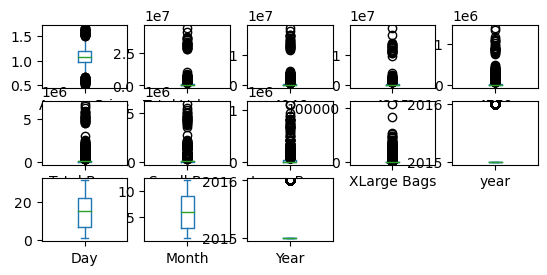

In [44]:
AVO.plot(kind='box',subplots=True,layout=(5,5))

# Than Check distribution of skewness

To check the distribution of skewness for a specific column in the DataFrame `AVO`, we can use the `sns.displot()` function from the seaborn library. 
When we execute this code, seaborn will create a histogram with a KDE (Kernel Density Estimation) curve for the any column in the DataFrame `AVO`. This will allow you to visually inspect the distribution and skewness of the data in that column.


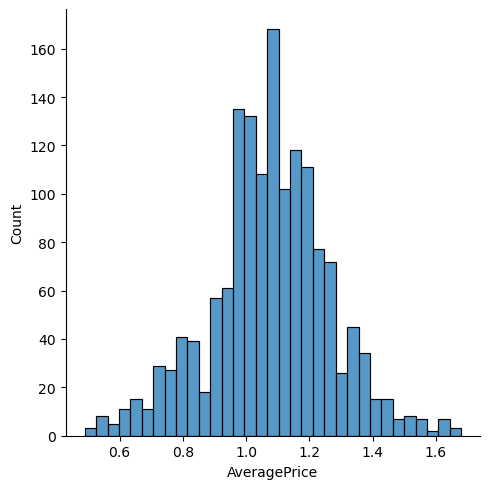

In [45]:
sns.displot(AVO['AveragePrice'])

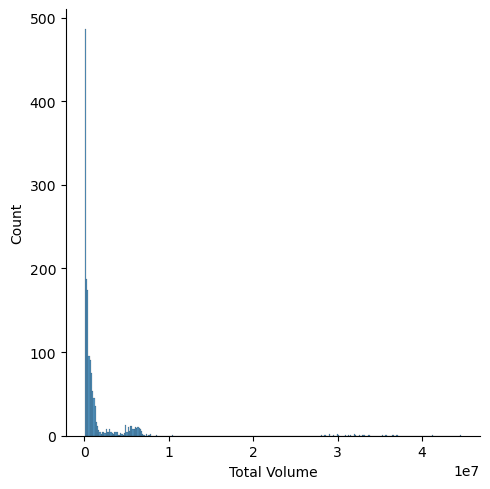

In [46]:
sns.displot(AVO['Total Volume'])

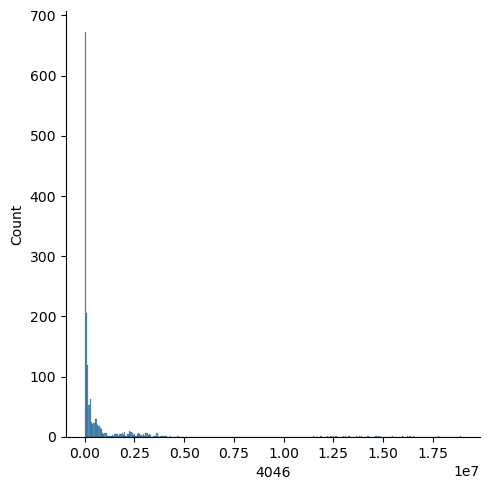

In [47]:
sns.displot(AVO['4046'])

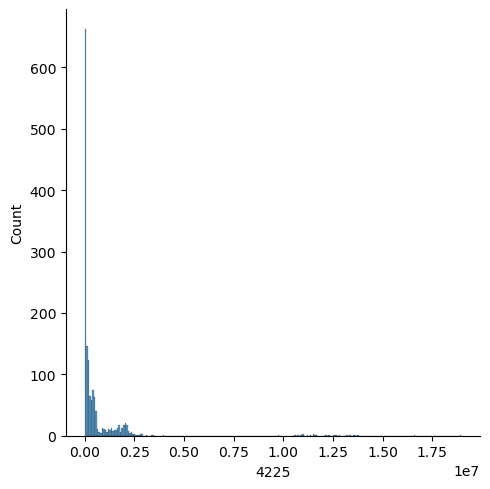

In [48]:
sns.displot(AVO['4225'])

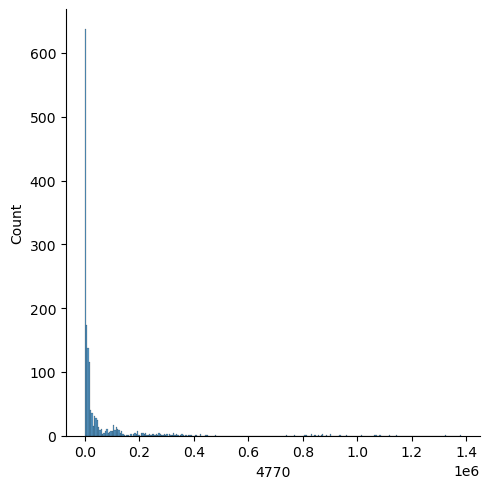

In [49]:
sns.displot(AVO['4770'])

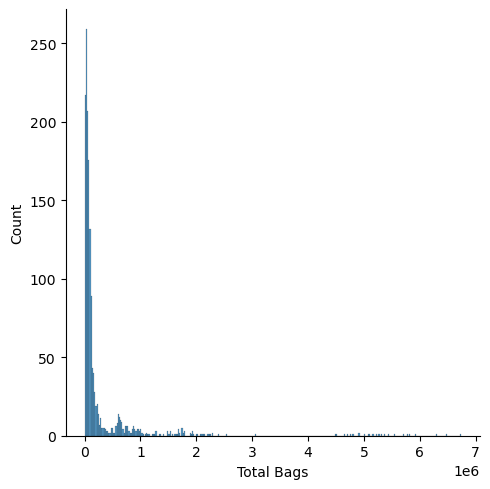

In [51]:
sns.displot(AVO['Total Bags'])

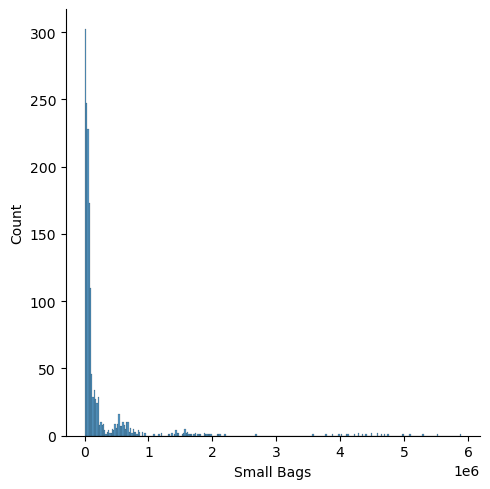

In [52]:
sns.displot(AVO['Small Bags'])

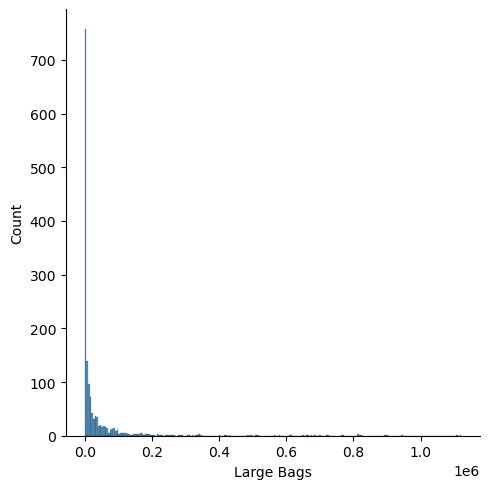

In [53]:
sns.displot(AVO['Large Bags'])

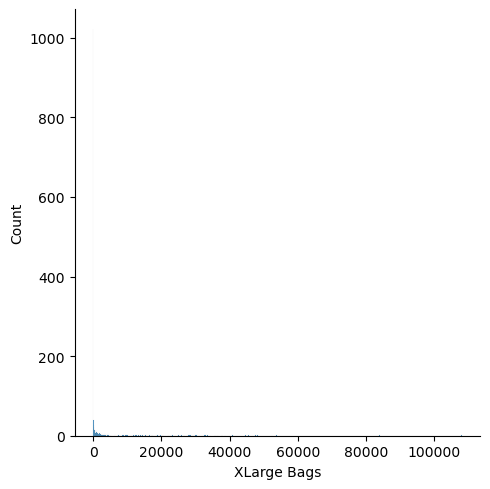

In [54]:
sns.displot(AVO['XLarge Bags'])

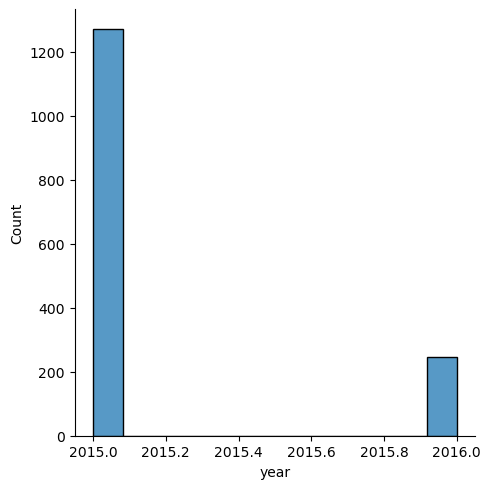

In [55]:
sns.displot(AVO['year'])

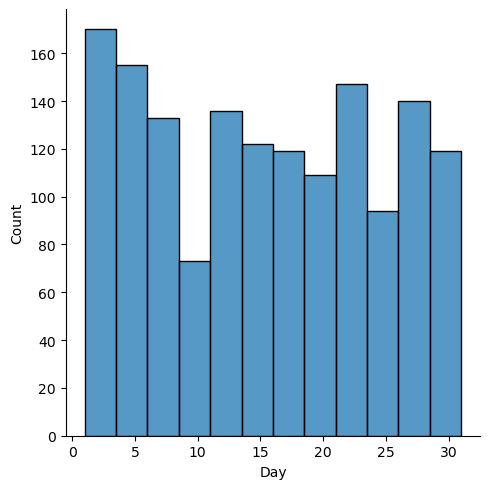

In [56]:
sns.displot(AVO['Day'])

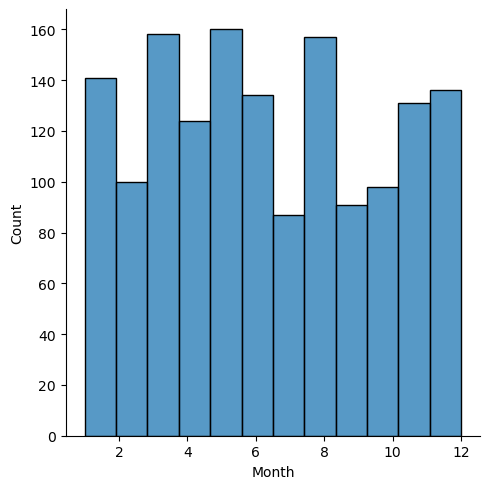

In [57]:
sns.displot(AVO['Month'])

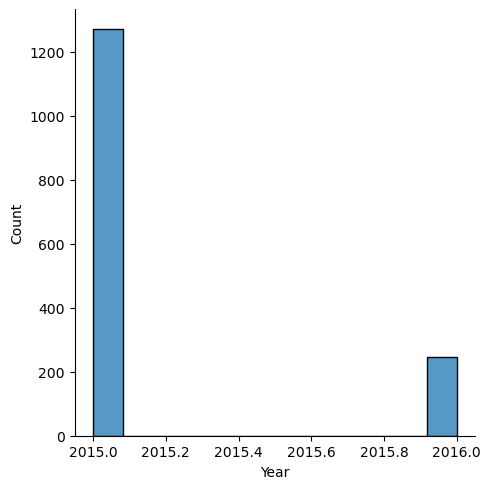

In [58]:
sns.displot(AVO['Year'])

# Uses the plot.hist()
function to plot a histogram for the column 'AveragePrice' in the DataFrame AVO. This is a quick and simple way to visualize the distribution of the data in the 'AveragePrice' column.

When we execute this code, it will generate a histogram for the data in the 'AveragePrice' column of the DataFrame AVO. The x-axis will represent the values in the 'AveragePrice' column, and the y-axis will represent the frequency (count) of each value. The histogram provides a visual representation of the distribution of data in the 'AveragePrice' column, showing how the values are spread across different bins or intervals.

<Axes: ylabel='Frequency'>

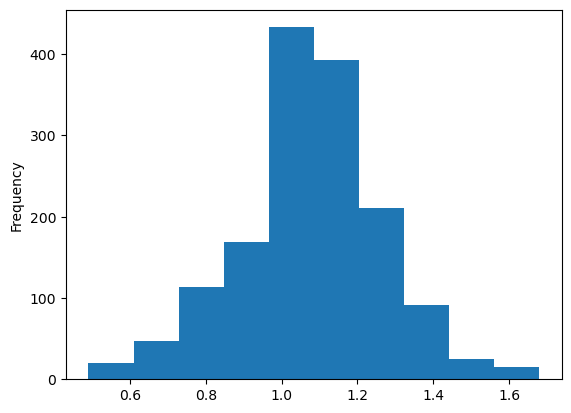

In [60]:
AVO['AveragePrice'].plot.hist()

# uses the `sns.pairplot()`
function from the seaborn library to create a pair plot for the DataFrame `AVO`. A pair plot is a powerful visualization tool that allows to quickly analyze the relationships between multiple numerical variables in a dataset.

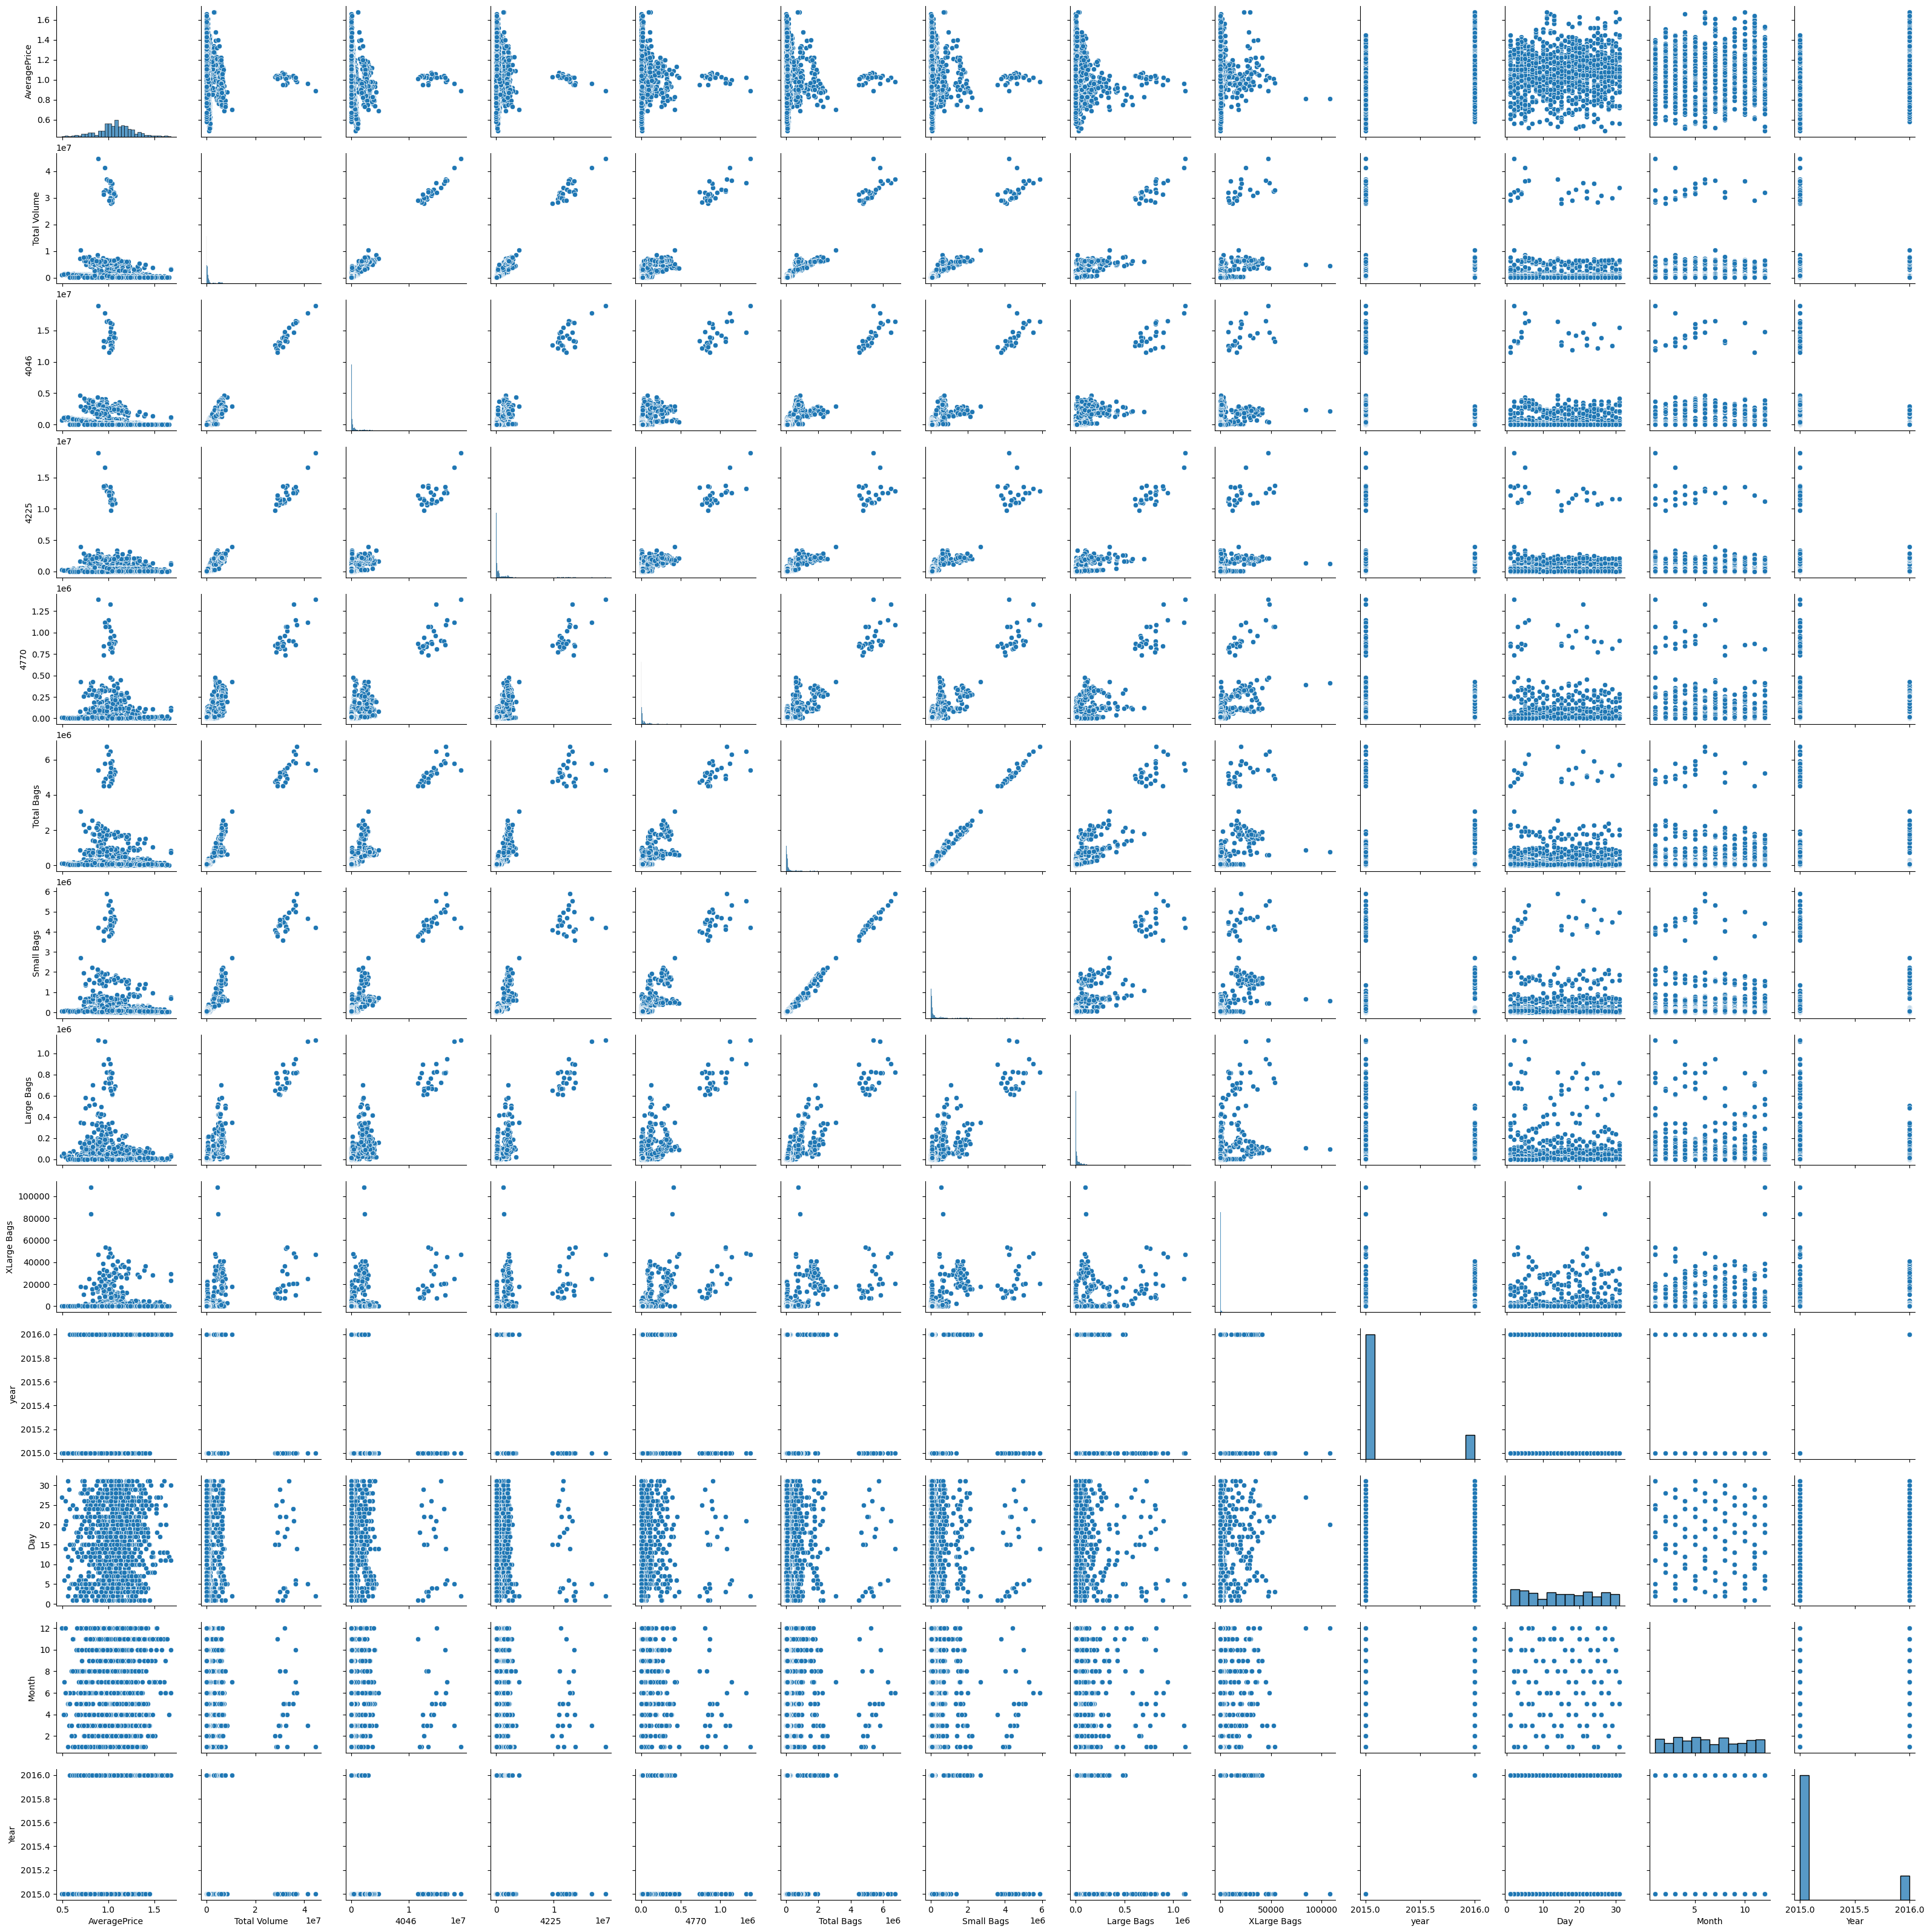

In [61]:
sns.pairplot(AVO)

<Axes: >

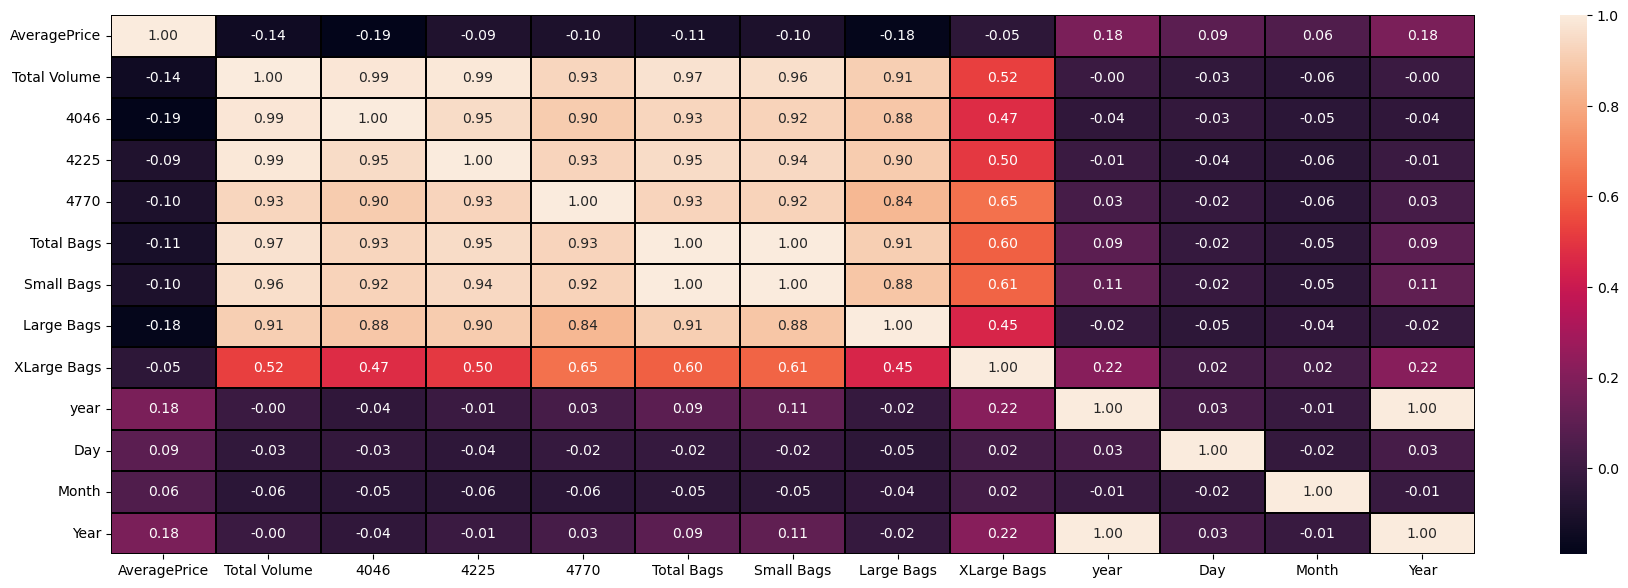

In [62]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(AVO.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Regression Conclusion

The dataset 'AVO' contains the following columns:

1. Unnamed: 0: An unnamed index or identifier for each row.
2. Date: The date of the observation.
3. AveragePrice: The average price of avocados.
4. Total Volume: The total volume of avocados sold.
5. 4046: Total number of avocados with PLU 4046 sold.
6. 4225: Total number of avocados with PLU 4225 sold.
7. 4770: Total number of avocados with PLU 4770 sold.
8. Total Bags: The total number of bags sold (including Small Bags, Large Bags, and XLarge Bags).
9. Small Bags: The number of small bags of avocados sold.
10. Large Bags: The number of large bags of avocados sold.
11. XLarge Bags: The number of extra-large bags of avocados sold.
12. type: The type of avocado, either organic or conventional.
13. year: The year of the observation.
14. region: The region where the avocados were sold.

In [21]:
# Load the dataset
AVO = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

# Check the column names
print(AVO.columns)


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


The 'Unnamed: 0' column has been dropped from the 'AVO' dataset. The dataset is now updated without the unnecessary index column. You can continue with further data exploration, analysis, or model building using the modified dataset.

In [25]:
# Drop the 'Unnamed: 0' column as it seems to be an unnecessary index
AVO.drop('Unnamed: 0', axis=1, inplace=True)

All rows with missing values (NaN) have been dropped from the 'AVO' dataset. The dataset is now cleaned and ready for further analysis or model building without any missing data. Remember to handle missing values appropriately based on the nature of the data and the task at hand. In this case, dropping rows with missing values can be a reasonable approach if the dataset is large and the missing values are relatively few. However, for smaller datasets or when missing values are more prevalent, other strategies such as imputation or data transformation may be more suitable.

In [26]:
# Drop any rows with missing values (NaN)
AVO.dropna(inplace=True)

successfully extracted the day, month, and year from the 'Date' column in the 'AVO' dataset and created new columns 'Day', 'Month', and 'Year' respectively. Now the 'Date' column has been dropped, and you have separate columns for day, month, and year. This can be useful for time-based analysis or for feeding the data into machine learning models that require numerical features.

We have dataset is now updated and ready for further analysis or model building with the additional temporal information. Remember to explore the data further and consider feature scaling or encoding for categorical variables if needed, depending on the specific analysis or model you plan to undertake.

In [27]:
# Extract day, month, and year from the 'Date' column
AVO['Date'] = pd.to_datetime(AVO['Date'])
AVO['Day'] = AVO['Date'].dt.day
AVO['Month'] = AVO['Date'].dt.month
AVO['Year'] = AVO['Date'].dt.year
AVO.drop('Date', axis=1, inplace=True)

We have performed one-hot encoding for the 'type' column in the 'AVO' dataset. By setting drop_first=True, you have created dummy variables for the 'type' column and removed one of the encoded columns to prevent multicollinearity in regression models.

Now, the 'type' column has been replaced with a new column that represents the 'type_organic'. A value of 1 in this column indicates that the avocado is organic, while a value of 0 indicates that it is conventional.

We have dataset is now updated with the one-hot encoded 'type' column, and you can continue with your analysis or build machine learning models that require numerical representation of categorical variables.

In [28]:
# Perform One-Hot Encoding for the 'type' column
AVO = pd.get_dummies(AVO, columns=['type'], drop_first=True)

successfully split the data into features (X) and the target variable (y).

The variable 'X' contains all the features except the 'region' column, which was dropped as it represents the target variable.

The variable 'y' contains the target variable 'region', which is the region where the avocados were sold.

With the data split into features and the target, we can proceed with further data preprocessing, model training, or any other analysis as per us requirements. 

In [29]:
# Split the data into features (X) and target (y)
X = AVO.drop(['region'], axis=1)  # Features excluding the 'region' column
y = AVO['region']  # Target variable 'region'

successfully split the data into training and testing sets using the train_test_split function from scikit-learn.

The data is divided into the following sets:

X_train: Training features (80% of the data)
X_test: Testing features (20% of the data)
y_train: Training target (corresponding labels for X_train)
y_test: Testing target (corresponding labels for X_test)
The test_size parameter is set to 0.2, which means 20% of the data will be used for testing, and the remaining 80% will be used for training. The random_state parameter is set to 42, ensuring reproducibility in the random shuffling of the data.

With the data split into training and testing sets, we can now proceed with building and evaluating our machine learning models.

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We have created the classifier for the next step of the process. In this case, you have chosen the RandomForestClassifier, which is a popular and effective ensemble learning method.

Now, you can proceed with training the classifier using the training data you split earlier. The classifier will learn from the features in X_train and their corresponding labels in y_train. After training, the classifier will be able to make predictions on unseen data.

In [31]:
# Step 2: Create and train the classifier
classifier = RandomForestClassifier()  # You can use any other classifier of your choice

We have successfully trained the classification model using the RandomForestClassifier.

The model has been fitted to the training data (X_train and y_train) and is now ready to make predictions on new, unseen data.

Since you have used the RandomForestClassifier, the model is an ensemble of decision trees that work together to make predictions. Random Forest is a powerful and versatile algorithm known for its ability to handle complex relationships in the data and perform well in a variety of classification tasks.

Now that the model is trained, you can proceed to the next step, which is evaluating the model's performance on the test data (X_test and y_test). This will give an idea of how well the model is likely to perform on new, unseen data.

In [32]:
# Step 3: Train the Classification Model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Step 4: Predictions and Evaluation
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9736842105263158
Precision: 0.97531067251462
Recall: 0.9736842105263158
F1 Score: 0.9723868994420567
Confusion Matrix:
 [[ 9  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  7]]


successfully calculated and printed the evaluation metrics for your classification model. The model's performance on the test data is as follows:

Accuracy: 0.9736842105263158
Precision: 0.97531067251462
Recall: 0.9736842105263158
F1 Score: 0.9723868994420567
These metrics provide insights into how well the classifier is performing on the test data. High accuracy, precision, recall, and F1 score values indicate that the model is making accurate and reliable predictions on the test set.

The confusion matrix shows the distribution of correct and incorrect predictions across different classes (regions). Each row represents the actual class, and each column represents the predicted class. For example, the value in the first row and first column (index [0, 0]) shows the number of true negatives (correctly predicted instances with class 0), and the value in the second row and first column (index [1, 0]) shows the number of false negatives (incorrectly predicted instances with class 0).
